In [20]:
import pandas as pd
import numpy as np

# 랜덤 시드 설정
np.random.seed(42)

# 데이터 크기
n_samples = 1000

# 데이터 생성
data = pd.DataFrame({
    'CustomerID': range(1, n_samples + 1),
    'Age': np.random.randint(18, 75, n_samples),
    'MonthlyCharges': np.random.uniform(20, 150, n_samples),
    'Tenure': np.random.randint(1, 72, n_samples),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_samples, p=[0.6, 0.3, 0.1]),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], n_samples),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], n_samples, p=[0.4, 0.5, 0.1]),
    'OnlineSecurity': np.random.choice(['Yes', 'No'], n_samples, p=[0.3, 0.7]),
    'TechSupport': np.random.choice(['Yes', 'No'], n_samples, p=[0.2, 0.8]),
    'StreamingTV': np.random.choice(['Yes', 'No'], n_samples, p=[0.5, 0.5]),
    'StreamingMovies': np.random.choice(['Yes', 'No'], n_samples, p=[0.5, 0.5]),
    'Churn': np.random.choice([0, 1], n_samples, p=[0.75, 0.25])  # 75% 유지, 25% 이탈
})

# CSV 저장
data.to_csv("customer_churn.csv", index=False)

# 데이터 미리보기
print(data.head())


   CustomerID  Age  MonthlyCharges  Tenure        Contract  PaymentMethod  \
0           1   56       84.040352      57        One year  Bank transfer   
1           2   69       62.737709      25  Month-to-month    Credit card   
2           3   46      102.342111       2  Month-to-month    Credit card   
3           4   32       51.218930      64  Month-to-month   Mailed check   
4           5   60       29.862233      35  Month-to-month   Mailed check   

  InternetService OnlineSecurity TechSupport StreamingTV StreamingMovies  \
0             DSL             No          No         Yes              No   
1     Fiber optic            Yes          No         Yes             Yes   
2             DSL             No          No          No             Yes   
3             DSL             No         Yes         Yes             Yes   
4     Fiber optic             No          No          No             Yes   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0  


,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(1000, 12)"
4,Transformed data shape,"(1000, 19)"
5,Transformed train set shape,"(700, 19)"
6,Transformed test set shape,"(300, 19)"
7,Numeric features,4
8,Categorical features,7
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7729,0.4927,0.0000,0.0000,0.0000,0.0000,0.0000,0.6190
ridge,Ridge Classifier,0.7729,0.4905,0.0000,0.0000,0.0000,0.0000,0.0000,0.1060
lda,Linear Discriminant Analysis,0.7729,0.4900,0.0000,0.0000,0.0000,0.0000,0.0000,0.1060
dummy,Dummy Classifier,0.7729,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1040
rf,Random Forest Classifier,0.7657,0.4753,0.0188,0.2250,0.0335,0.0058,0.0130,0.3030
ada,Ada Boost Classifier,0.7571,0.4926,0.0379,0.3083,0.0662,0.0102,0.0247,0.2170
nb,Naive Bayes,0.7500,0.4707,0.0125,0.0600,0.0188,-0.0271,-0.0417,0.1120
gbc,Gradient Boosting Classifier,0.7371,0.4961,0.0442,0.1786,0.0690,-0.0190,-0.0254,0.3500
knn,K Neighbors Classifier,0.7314,0.5174,0.1204,0.2762,0.1644,0.0381,0.0416,0.1130
et,Extra Trees Classifier,0.7286,0.4460,0.0250,0.1033,0.0401,-0.0526,-0.0698,0.2680


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7730,0.5451,0.0000,0.0000,0.0000,0.0000,0.0000


Index(['CustomerID', 'Age', 'MonthlyCharges', 'Tenure', 'Contract',
       'PaymentMethod', 'InternetService', 'OnlineSecurity', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn', 'prediction_label',
       'prediction_score'],
      dtype='object')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7730,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Index(['CustomerID', 'Age', 'MonthlyCharges', 'Tenure', 'Contract',
       'PaymentMethod', 'InternetService', 'OnlineSecurity', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn', 'prediction_label'],
      dtype='object')
❌ RidgeClassifier 모델에 확률값 컬럼 없음. 스킵합니다.


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7730,0.5449,0.0000,0.0000,0.0000,0.0000,0.0000


Index(['CustomerID', 'Age', 'MonthlyCharges', 'Tenure', 'Contract',
       'PaymentMethod', 'InternetService', 'OnlineSecurity', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn', 'prediction_label',
       'prediction_score'],
      dtype='object')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.7730,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Index(['CustomerID', 'Age', 'MonthlyCharges', 'Tenure', 'Contract',
       'PaymentMethod', 'InternetService', 'OnlineSecurity', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn', 'prediction_label',
       'prediction_score'],
      dtype='object')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Index(['CustomerID', 'Age', 'MonthlyCharges', 'Tenure', 'Contract',
       'PaymentMethod', 'InternetService', 'OnlineSecurity', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn', 'prediction_label',
       'prediction_score'],
      dtype='object')


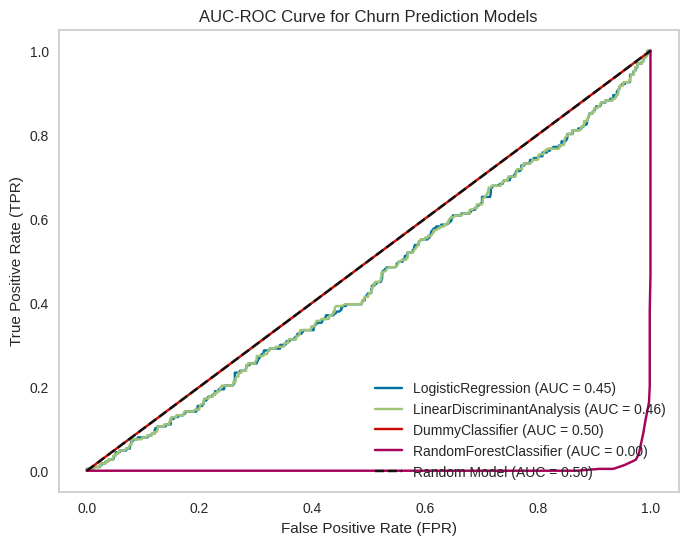

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from pycaret.classification import *

# 범주형 변수 리스트 설정
categorical_cols = ['Contract', 'PaymentMethod', 'InternetService',
                    'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# PyCaret 설정
clf = setup(data,
            target='Churn',
            session_id=123,
            categorical_features=categorical_cols)  # 범주형 변수 직접 지정

# 여러 모델 학습 및 비교
models = compare_models(n_select=5)  # 성능이 좋은 상위 5개 모델 선택

# AUC-ROC 그래프
plt.figure(figsize=(8, 6))

for model in models:
    # 모델 학습
    final_model = finalize_model(model)

    # 예측
    predictions = predict_model(final_model, data=data)

    # 예측 결과 컬럼 확인
    print(predictions.columns)  # 컬럼 목록 확인

    # 확률값이 포함된 컬럼 찾기
    prob_col = None
    if 'Score' in predictions.columns:
        prob_col = 'Score'
    elif 'prediction_score' in predictions.columns:
        prob_col = 'prediction_score'
    else:
        print(f"❌ {str(model).split('(')[0]} 모델에 확률값 컬럼 없음. 스킵합니다.")
        continue  # 확률값이 없으면 해당 모델 건너뛰기

    # ROC Curve 계산
    fpr, tpr, _ = roc_curve(data['Churn'], predictions[prob_col])
    roc_auc = auc(fpr, tpr)

    # 그래프 그리기
    plt.plot(fpr, tpr, label=f"{str(model).split('(')[0]} (AUC = {roc_auc:.2f})")

# 랜덤 모델 기준선
plt.plot([0, 1], [0, 1], 'k--', label="Random Model (AUC = 0.50)")

# 그래프 설정
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve for Churn Prediction Models')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [31]:
print(clf.X_train.head())  # 변환된 훈련 데이터 출력
print(clf.X_test.head())   # 변환된 테스트 데이터 출력

     CustomerID  Age  MonthlyCharges  Tenure        Contract  \
355         356   63      138.858841      27  Month-to-month   
129         130   58       97.433037      52  Month-to-month   
225         226   41      140.323914       2  Month-to-month   
747         748   44       84.765442      20        One year   
583         584   27      126.335716      47  Month-to-month   

        PaymentMethod InternetService OnlineSecurity TechSupport StreamingTV  \
355  Electronic check     Fiber optic             No         Yes          No   
129       Credit card              No            Yes          No         Yes   
225  Electronic check     Fiber optic            Yes         Yes          No   
747  Electronic check     Fiber optic             No          No         Yes   
583      Mailed check     Fiber optic            Yes          No         Yes   

    StreamingMovies  
355             Yes  
129              No  
225             Yes  
747             Yes  
583             Yes  
  

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(1000, 11)"
4,Transformed data shape,"(1000, 18)"
5,Transformed train set shape,"(700, 18)"
6,Transformed test set shape,"(300, 18)"
7,Numeric features,3
8,Categorical features,7
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7729,0.4985,0.0000,0.0000,0.0000,0.0000,0.0000,0.7550
ridge,Ridge Classifier,0.7729,0.4970,0.0000,0.0000,0.0000,0.0000,0.0000,0.1040
lda,Linear Discriminant Analysis,0.7729,0.4965,0.0000,0.0000,0.0000,0.0000,0.0000,0.1060
dummy,Dummy Classifier,0.7729,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1000
ada,Ada Boost Classifier,0.7586,0.4782,0.0125,0.1500,0.0229,-0.0134,-0.0183,0.3120
rf,Random Forest Classifier,0.7557,0.4892,0.0125,0.0750,0.0211,-0.0192,-0.0364,0.2950
nb,Naive Bayes,0.7486,0.4719,0.0062,0.0100,0.0077,-0.0357,-0.0546,0.1820
knn,K Neighbors Classifier,0.7371,0.5311,0.1250,0.3611,0.1773,0.0567,0.0765,0.1140
gbc,Gradient Boosting Classifier,0.7329,0.4744,0.0312,0.1133,0.0447,-0.0408,-0.0579,0.2360
et,Extra Trees Classifier,0.7200,0.4709,0.0375,0.1126,0.0559,-0.0549,-0.0700,0.2610


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7730,0.5450,0.0000,0.0000,0.0000,0.0000,0.0000


Index(['Age', 'MonthlyCharges', 'Tenure', 'Contract', 'PaymentMethod',
       'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Churn', 'prediction_label', 'prediction_score'],
      dtype='object')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7730,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Index(['Age', 'MonthlyCharges', 'Tenure', 'Contract', 'PaymentMethod',
       'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Churn', 'prediction_label'],
      dtype='object')
❌ RidgeClassifier 모델에 확률값 컬럼 없음. 스킵합니다.


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7730,0.5448,0.0000,0.0000,0.0000,0.0000,0.0000


Index(['Age', 'MonthlyCharges', 'Tenure', 'Contract', 'PaymentMethod',
       'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Churn', 'prediction_label', 'prediction_score'],
      dtype='object')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.7730,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Index(['Age', 'MonthlyCharges', 'Tenure', 'Contract', 'PaymentMethod',
       'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Churn', 'prediction_label', 'prediction_score'],
      dtype='object')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7810,0.7080,0.0441,0.8333,0.0837,0.0623,0.1595


Index(['Age', 'MonthlyCharges', 'Tenure', 'Contract', 'PaymentMethod',
       'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Churn', 'prediction_label', 'prediction_score'],
      dtype='object')


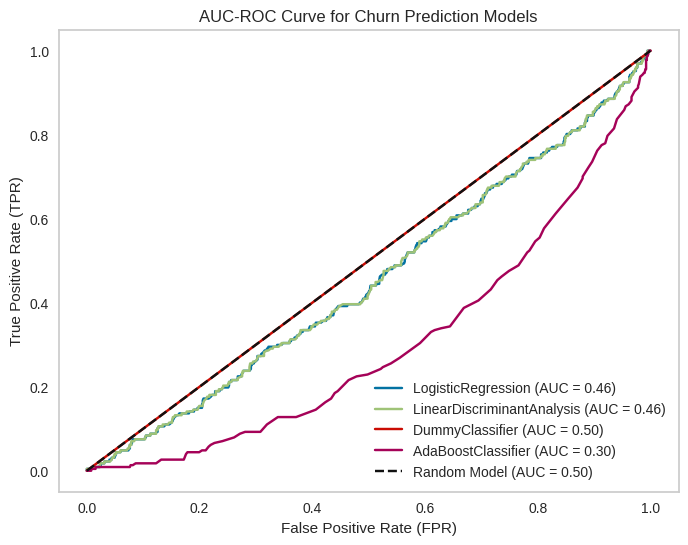

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from pycaret.classification import *

# 데이터 불러오기
data = pd.read_csv("customer_churn.csv")

# 불필요한 컬럼 제거 (예: CustomerID)
if 'CustomerID' in data.columns:
    data.drop(columns=['CustomerID'], inplace=True)

# 범주형 변수 리스트 설정
categorical_cols = ['Contract', 'PaymentMethod', 'InternetService',
                    'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# PyCaret 설정
clf = setup(data,
            target='Churn',
            session_id=123,
            categorical_features=categorical_cols)  # 범주형 변수 직접 지정

# 여러 모델 학습 및 비교
models = compare_models(n_select=5)  # 성능이 좋은 상위 5개 모델 선택

# AUC-ROC 그래프
plt.figure(figsize=(8, 6))

for model in models:
    # 모델 학습
    final_model = finalize_model(model)

    # 예측
    predictions = predict_model(final_model, data=data)

    # 예측 결과 컬럼 확인
    print(predictions.columns)  # 컬럼 목록 확인

    # 확률값이 포함된 컬럼 찾기
    prob_col = None
    if 'Score' in predictions.columns:
        prob_col = 'Score'
    elif 'prediction_score' in predictions.columns:
        prob_col = 'prediction_score'
    else:
        print(f"❌ {str(model).split('(')[0]} 모델에 확률값 컬럼 없음. 스킵합니다.")
        continue  # 확률값이 없으면 해당 모델 건너뛰기

    # ROC Curve 계산
    fpr, tpr, _ = roc_curve(data['Churn'], predictions[prob_col])
    roc_auc = auc(fpr, tpr)

    # 그래프 그리기
    plt.plot(fpr, tpr, label=f"{str(model).split('(')[0]} (AUC = {roc_auc:.2f})")

# 랜덤 모델 기준선
plt.plot([0, 1], [0, 1], 'k--', label="Random Model (AUC = 0.50)")

# 그래프 설정
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve for Churn Prediction Models')
plt.legend(loc="lower right")
plt.grid()
plt.show()

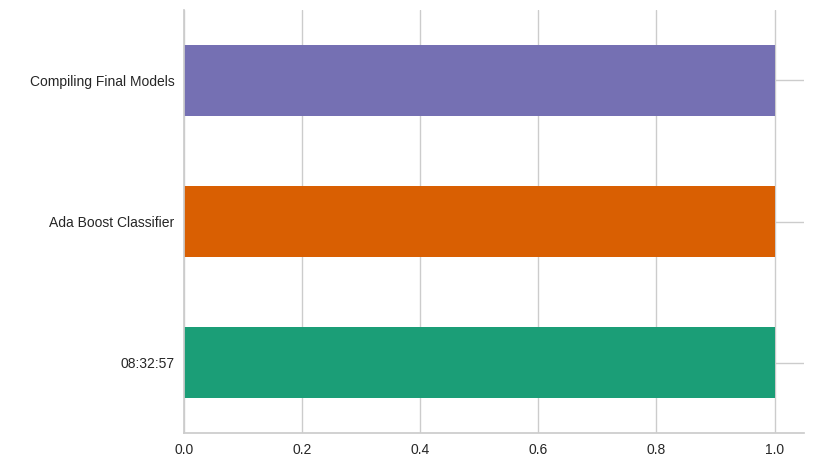

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [35]:
print(clf.X_train.head())  # 변환된 훈련 데이터 확인
print(clf.X_test.head())   # 변환된 테스트 데이터 확인


     Age  MonthlyCharges  Tenure        Contract     PaymentMethod  \
355   63      138.858841      27  Month-to-month  Electronic check   
129   58       97.433037      52  Month-to-month       Credit card   
225   41      140.323914       2  Month-to-month  Electronic check   
747   44       84.765442      20        One year  Electronic check   
583   27      126.335716      47  Month-to-month      Mailed check   

    InternetService OnlineSecurity TechSupport StreamingTV StreamingMovies  
355     Fiber optic             No         Yes          No             Yes  
129              No            Yes          No         Yes              No  
225     Fiber optic            Yes         Yes          No             Yes  
747     Fiber optic             No          No         Yes             Yes  
583     Fiber optic            Yes          No         Yes             Yes  
     Age  MonthlyCharges  Tenure        Contract     PaymentMethod  \
471   18      123.841820      30  Month-to-mont

In [41]:
# 'Yes', 'No' 값을 1과 0으로 변환
yes_no_cols = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in yes_no_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# PyCaret 설정 (명확하게 categorical_features 지정)
clf = setup(data,
            target='Churn',
            session_id=123,
            categorical_features=['Contract', 'PaymentMethod', 'InternetService'],
            numeric_features=['Age', 'MonthlyCharges', 'Tenure'] + yes_no_cols)  # 변환한 컬럼을 숫자로 처리


,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(1000, 11)"
4,Transformed data shape,"(1000, 14)"
5,Transformed train set shape,"(700, 14)"
6,Transformed test set shape,"(300, 14)"
7,Numeric features,7
8,Categorical features,3
9,Rows with missing values,100.0%


,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(1000, 11)"
4,Transformed data shape,"(1000, 18)"
5,Transformed train set shape,"(700, 18)"
6,Transformed test set shape,"(300, 18)"
7,Numeric features,7
8,Categorical features,3
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7729,0.4985,0.0000,0.0000,0.0000,0.0000,0.0000,0.8260
ridge,Ridge Classifier,0.7729,0.4970,0.0000,0.0000,0.0000,0.0000,0.0000,0.0770
lda,Linear Discriminant Analysis,0.7729,0.4965,0.0000,0.0000,0.0000,0.0000,0.0000,0.0800
dummy,Dummy Classifier,0.7729,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0750
ada,Ada Boost Classifier,0.7586,0.4782,0.0125,0.1500,0.0229,-0.0134,-0.0183,0.1960
rf,Random Forest Classifier,0.7557,0.4892,0.0125,0.0750,0.0211,-0.0192,-0.0364,0.2720
nb,Naive Bayes,0.7486,0.4719,0.0062,0.0100,0.0077,-0.0357,-0.0546,0.1050
knn,K Neighbors Classifier,0.7371,0.5311,0.1250,0.3611,0.1773,0.0567,0.0765,0.1400
gbc,Gradient Boosting Classifier,0.7329,0.4744,0.0312,0.1133,0.0447,-0.0408,-0.0579,0.2930
et,Extra Trees Classifier,0.7200,0.4709,0.0375,0.1126,0.0559,-0.0549,-0.0700,0.2370


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7730,0.5450,0.0000,0.0000,0.0000,0.0000,0.0000


Index(['Age', 'MonthlyCharges', 'Tenure', 'Contract', 'PaymentMethod',
       'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Churn', 'prediction_label', 'prediction_score'],
      dtype='object')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7730,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Index(['Age', 'MonthlyCharges', 'Tenure', 'Contract', 'PaymentMethod',
       'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Churn', 'prediction_label'],
      dtype='object')
❌ RidgeClassifier 모델에 확률값 컬럼 없음. 스킵합니다.


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7730,0.5448,0.0000,0.0000,0.0000,0.0000,0.0000


Index(['Age', 'MonthlyCharges', 'Tenure', 'Contract', 'PaymentMethod',
       'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Churn', 'prediction_label', 'prediction_score'],
      dtype='object')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.7730,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Index(['Age', 'MonthlyCharges', 'Tenure', 'Contract', 'PaymentMethod',
       'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Churn', 'prediction_label', 'prediction_score'],
      dtype='object')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7810,0.7080,0.0441,0.8333,0.0837,0.0623,0.1595


Index(['Age', 'MonthlyCharges', 'Tenure', 'Contract', 'PaymentMethod',
       'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Churn', 'prediction_label', 'prediction_score'],
      dtype='object')


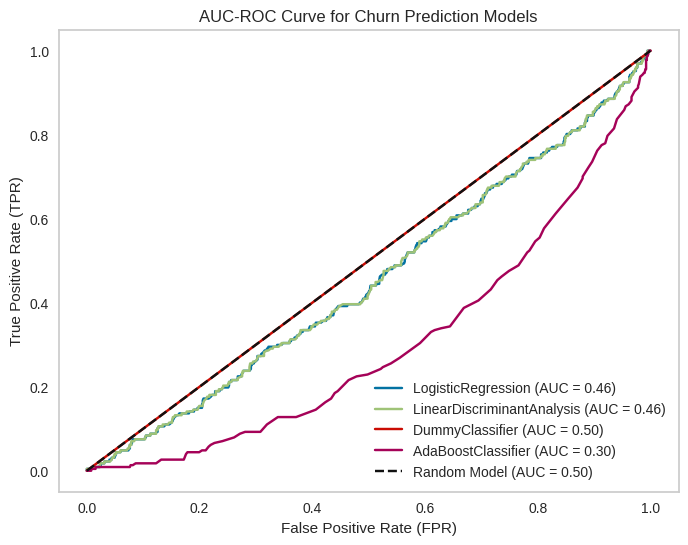

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from pycaret.classification import *

# 데이터 불러오기
data = pd.read_csv("customer_churn.csv")

# 불필요한 컬럼 제거 (예: CustomerID)
if 'CustomerID' in data.columns:
    data.drop(columns=['CustomerID'], inplace=True)

# 'Yes' / 'No' 값을 1과 0으로 변환
yes_no_cols = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in yes_no_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# 범주형 변수 리스트 설정
categorical_cols = ['Contract', 'PaymentMethod', 'InternetService']

# PyCaret 설정
clf = setup(data,
            target='Churn',
            session_id=123,
            categorical_features=categorical_cols,
            numeric_features=['Age', 'MonthlyCharges', 'Tenure'] + yes_no_cols)  # 숫자형 컬럼 지정

# 여러 모델 학습 및 비교
models = compare_models(n_select=5)  # 성능이 좋은 상위 5개 모델 선택

# AUC-ROC 그래프
plt.figure(figsize=(8, 6))

for model in models:
    # 모델 학습
    final_model = finalize_model(model)

    # 예측
    predictions = predict_model(final_model, data=data)

    # 예측 결과 컬럼 확인
    print(predictions.columns)  # 컬럼 목록 확인

    # 확률값이 포함된 컬럼 찾기
    prob_col = None
    if 'Score' in predictions.columns:
        prob_col = 'Score'
    elif 'prediction_score' in predictions.columns:
        prob_col = 'prediction_score'
    else:
        print(f"❌ {str(model).split('(')[0]} 모델에 확률값 컬럼 없음. 스킵합니다.")
        continue  # 확률값이 없으면 해당 모델 건너뛰기

    # ROC Curve 계산
    fpr, tpr, _ = roc_curve(data['Churn'], predictions[prob_col])
    roc_auc = auc(fpr, tpr)

    # 그래프 그리기
    plt.plot(fpr, tpr, label=f"{str(model).split('(')[0]} (AUC = {roc_auc:.2f})")

# 랜덤 모델 기준선
plt.plot([0, 1], [0, 1], 'k--', label="Random Model (AUC = 0.50)")

# 그래프 설정
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve for Churn Prediction Models')
plt.legend(loc="lower right")
plt.grid()
plt.show()
